In [17]:
import numpy as np
import matplotlib.pyplot as plt

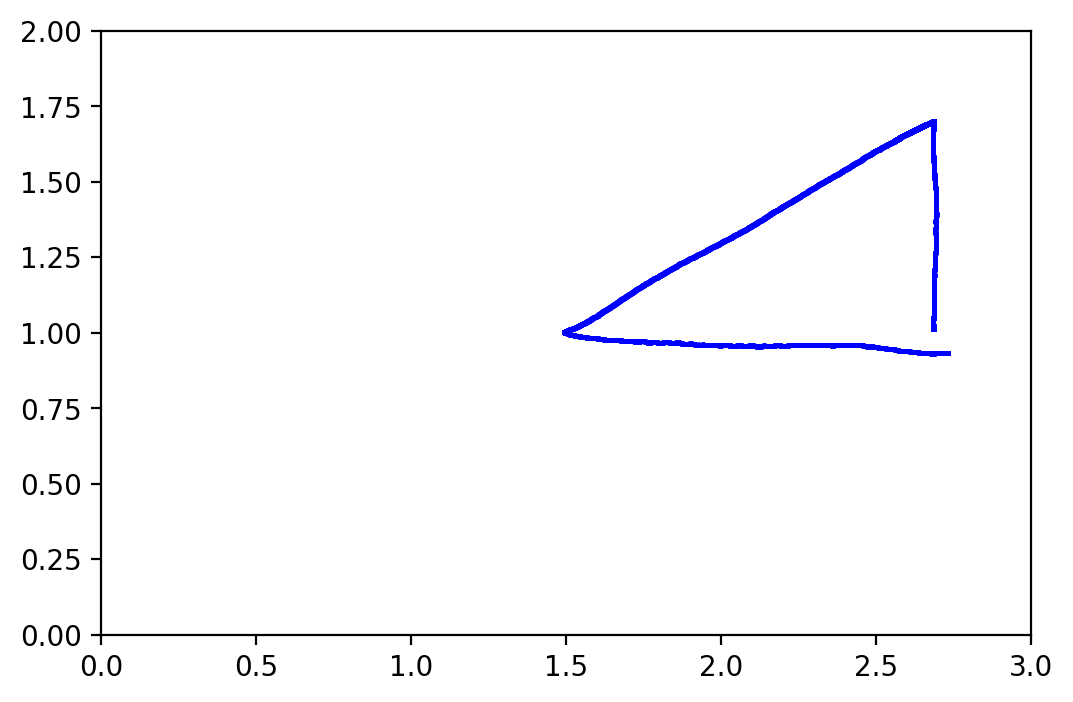

In [24]:
measurements = np.loadtxt("../logs/data_set_ground_true_test_1.txt")
plt.figure(dpi=200)
plt.xlim((0, 3))
plt.ylim((0, 2))
plt.scatter(measurements[:, 0], measurements[:, 1], color='blue', s=0.5)

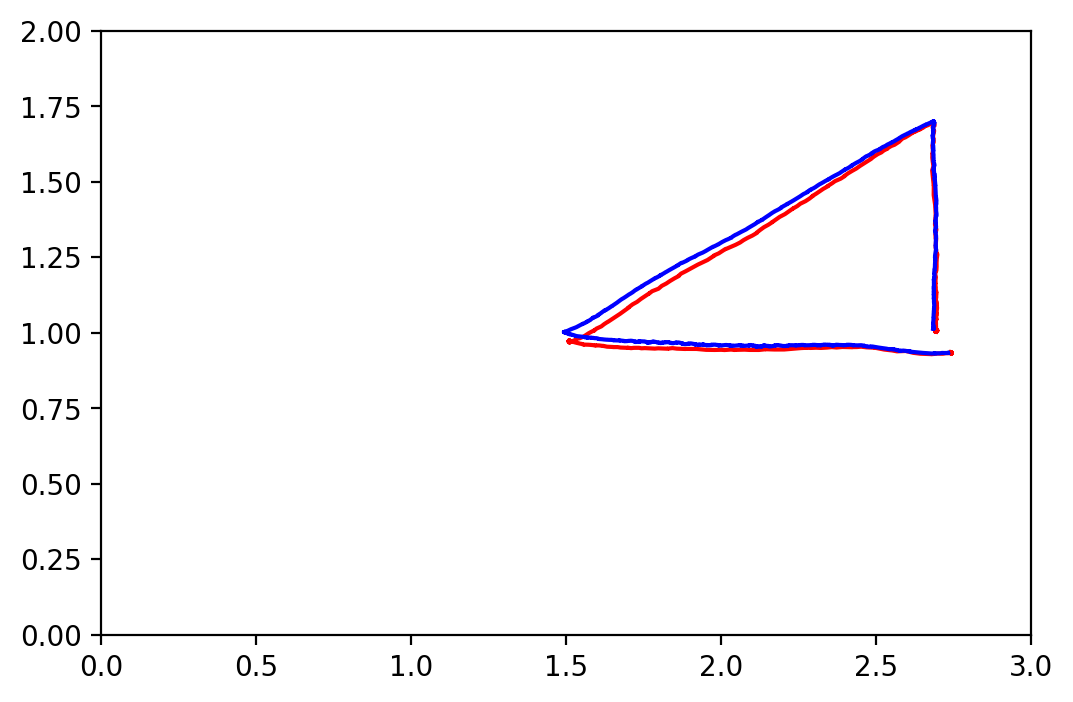

In [25]:
import rosbag
bagfile = rosbag.Bag("/home/cobotar/Documents/data_sets_for_Sausar/data_set_measurements_test_1.bag")
translations = []
coords = []
coord_x_odom = coord_y_odom = coord_x_main = coord_y_main = 0
for topic, msg, t in bagfile.read_messages(topics="/tf"):
    if msg.transforms[0].child_frame_id == "main_robot":
        coord_x_main = msg.transforms[0].transform.translation.x
        coord_y_main = msg.transforms[0].transform.translation.y
    if msg.transforms[0].child_frame_id == "main_robot_odom":
        coord_x_odom = msg.transforms[0].transform.translation.x
        coord_y_odom = msg.transforms[0].transform.translation.y
    coords.append([coord_x_odom - coord_x_main, coord_y_odom - coord_y_main])
#print(coords)
for i in range(20):
    coords.pop(0)
coords = np.array(coords)

plt.figure(dpi=200)
plt.xlim((0, 3))
plt.ylim((0, 2))
plt.plot(coords[:, 0], coords[:, 1], color='red')
plt.plot(measurements[:, 0], measurements[:, 1], color='blue')
bagfile.close()